In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Image Classification Task for ML Internship 2023/

/content/drive/MyDrive/Image Classification Task for ML Internship 2023


In [8]:
!cp -R "/content/drive/MyDrive/Image Classification Task for ML Internship 2023/euro2750/2750" "mydata"

In [2]:
pip install rasterio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 64.2 MB/s eta 0:00:00


In [9]:
#Import necessary packages
import os
import glob
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.models import Model
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Display plots without using plt.show()
%matplotlib inline

In [10]:
data_dir = "mydata"
batch_size = 32
img_height = 64
img_width = 64
validation_split=0.2
rescale=1.0/255

## **Data preparation**

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=validation_split, rescale=rescale)
dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir, image_size=(img_height, img_width), batch_size=batch_size)

Found 26959 files belonging to 10 classes.


In [12]:
train_dataset = datagen.flow_from_directory(batch_size=batch_size,
                                           directory=data_dir,
                                           shuffle=True,
                                           target_size=(img_height, img_width),
                                           subset="training",
                                           class_mode='categorical')

Found 21568 images belonging to 10 classes.


In [13]:
test_dataset = datagen.flow_from_directory(batch_size=batch_size,
                                           directory=data_dir,
                                           shuffle=True,
                                           target_size=(img_height, img_width),
                                           subset="validation",
                                           class_mode='categorical')

Found 5391 images belonging to 10 classes.


## **Data Visualisation**

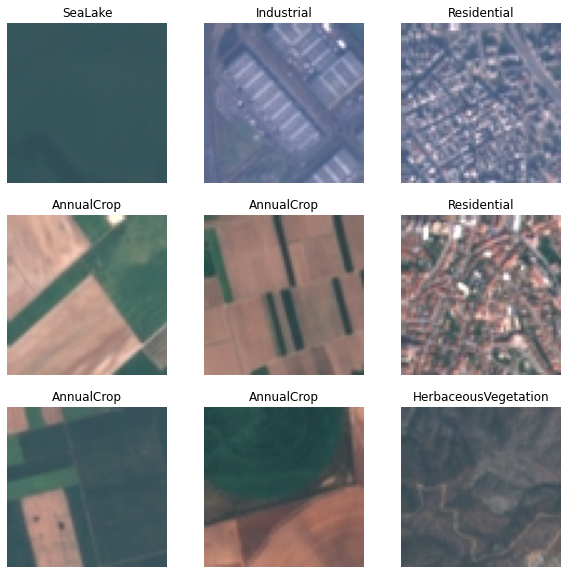

In [14]:
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10, batch_size=1024)

Epoch 1/10
674/674 [==============================] - 29s 26ms/step - loss: 1.1976 - accuracy: 0.5537 - val_loss: 0.9689 - val_accuracy: 0.6381
Epoch 2/10
674/674 [==============================] - 17s 25ms/step - loss: 0.7540 - accuracy: 0.7260 - val_loss: 0.6686 - val_accuracy: 0.7551
Epoch 3/10
674/674 [==============================] - 19s 28ms/step - loss: 0.6172 - accuracy: 0.7769 - val_loss: 0.7232 - val_accuracy: 0.7468
Epoch 4/10
674/674 [==============================] - 17s 25ms/step - loss: 0.5502 - accuracy: 0.8040 - val_loss: 0.5779 - val_accuracy: 0.7954
Epoch 5/10
674/674 [==============================] - 17s 25ms/step - loss: 0.4661 - accuracy: 0.8335 - val_loss: 0.5441 - val_accuracy: 0.8139
Epoch 6/10
674/674 [==============================] - 17s 25ms/step - loss: 0.4142 - accuracy: 0.8523 - val_loss: 0.5987 - val_accuracy: 0.7871
Epoch 7/10
674/674 [==============================] - 19s 29ms/step - loss: 0.3652 - accuracy: 0.8697 - val_loss: 0.5872 - val_accuracy:

In [19]:
loss, accuracy = model.evaluate(test_dataset)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

169/169 [==============================] - 5s 28ms/step - loss: 0.5225 - accuracy: 0.8464
Test loss: 0.5225
Test accuracy: 0.8464


In [28]:
model.save('model.h5')

# **Confusion matrix**



In [20]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for i, (image_batch, label_batch) in enumerate(test_dataset):   # use dataset.unbatch() with repeat
    # append true labels
    y_true.append(label_batch)
    # compute predictions
    preds = model.predict(image_batch)
    # append predicted labels
    y_pred.append(np.argmax(preds, axis =  1))
    if i==300:
        break

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
correct_labels = np.argmax(correct_labels, axis=1)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 0s 25ms/step


In [21]:
cm = confusion_matrix(correct_labels, predicted_labels)
cm

array([[ 884,   14,   30,   22,    2,   30,   59,    2,   25,   10],
       [   0, 1043,   10,    2,    0,    5,    0,    0,    0,    6],
       [   1,    7,  876,   23,   12,   12,  116,   14,    6,    1],
       [  16,    3,   28,  640,   29,   25,   77,   32,   25,    0],
       [   0,    0,    6,   14,  797,    0,    6,   42,    2,    0],
       [   3,   67,   38,   19,    0,  550,   19,    0,    8,   10],
       [  27,    0,  118,   57,    3,    8,  665,    6,   15,    0],
       [   0,    0,    3,   10,   12,    0,    2, 1030,    0,    0],
       [  25,   26,   25,  170,    1,   44,   26,    0,  580,    8],
       [   4,   13,    4,    0,    0,    8,    0,    0,    8, 1049]])

In [26]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        figsize=(10, 10),
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


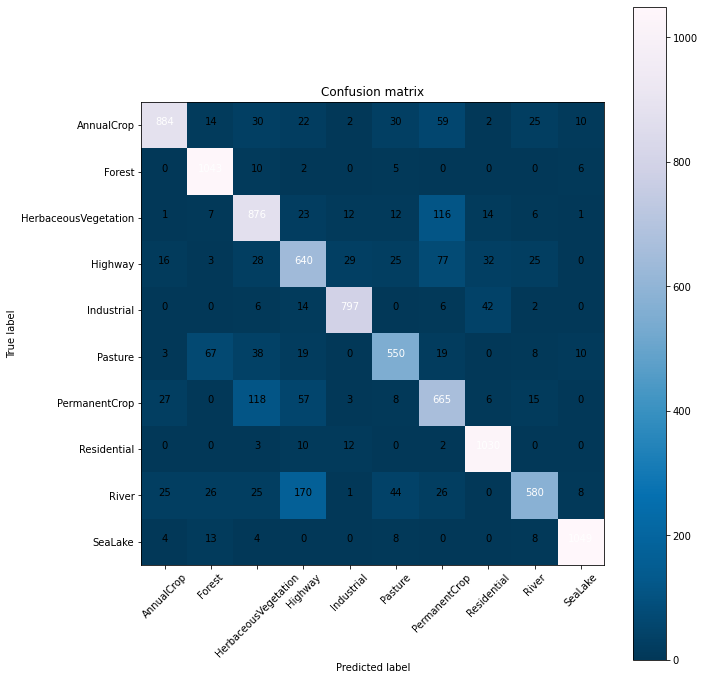

In [27]:
plot_confusion_matrix(cm, train_dataset.class_indices, cmap='PuBu_r')


# **Perform inference**

In [34]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# Load the saved model
model_path = 'model.h5'
model = load_model(model_path)

# Define the class names
classes = ['AnnualCrop', 'Forest', 'HerbaceousVegatation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLakes']

data_dir = "mydata"

sample_images = []
sample_class_names = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    sample_img_names = np.random.choice(os.listdir(class_dir), size=2, replace=False)
    for img_name in sample_img_names:
        img = Image.open(os.path.join(class_dir, img_name))
        img = np.array(img.resize((64, 64)))
        sample_images.append(img)
        sample_class_names.append(class_name)
sample_images = np.array(sample_images)
sample_class_names = np.array(sample_class_names)

# Perform inference on the sample images
predictions = model.predict(sample_images)

# Convert the predictions into class names
predicted_classes = [classes[np.argmax(p)] for p in predictions]

# Save classification results
results_dir = '/content/drive/MyDrive/Image Classification Task for ML Internship 2023/results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
with open(os.path.join(results_dir, 'sample_results.txt'), 'w') as f:
    for i in range(len(sample_class_names)):
        f.write(f'actual - {sample_class_names[i]}, predicted - {predicted_classes[i]}\n')

1/1 [==============================] - 0s 68ms/step
